<a href="https://colab.research.google.com/github/Shehab-7/Machine-Learning-1/blob/main/Copy_of_Copy_of_Polynomial_regression_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing and regularization

In [3]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 186 (delta 85), reused 150 (delta 49), pack-reused 0
Receiving objects: 100% (186/186), 34.12 MiB | 20.55 MiB/s, done.
Resolving deltas: 100% (85/85), done.
/content/machine_learning_1/polynomial_regression


In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

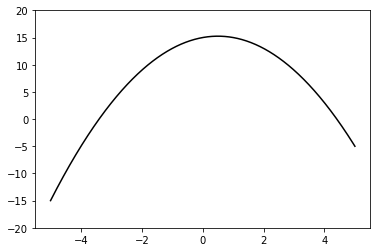

In [5]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [6]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

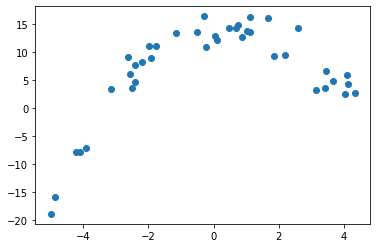

In [7]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [8]:
for datasample in zip(X,Y):
    print(datasample)

(3.4442185152504816, 6.685961311021467)
(-2.4108324970703663, 4.690236225597948)
(0.11274721368608542, 12.205789026637378)
(-1.9668727392107255, 11.133217991032268)
(-0.23403045847644144, 10.927272159051856)
(0.046868558173902564, 12.8584762866286)
(-2.1816215560029617, 8.16012255928749)
(-2.4949365863755943, 3.5061587527226514)
(4.097462559682402, 5.933186396721837)
(4.021659504395828, 2.454299054753137)
(-1.8985243068066735, 8.956020414039855)
(1.8398393191544127, 9.208004401915796)
(-0.2785728454728664, 16.36505651355184)
(1.1088697344380165, 16.14144978027318)
(4.130110532378982, 4.299534274468492)
(3.6530992777164, 4.83366913200435)
(-2.395076896080406, 7.723543125251446)
(-4.8595829983598104, -15.848718674227753)
(2.1970468640395415, 9.366124268570305)
(1.6815320123185087, 16.070558182542374)
(-4.988571806855717, -18.893035332565795)
(-2.5608912311286804, 6.043189895391749)
(-1.7479563725260991, 11.091071520573042)
(0.6751074062067186, 14.272553413210698)
(-2.6138407138477984, 9.

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [9]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    trans = PolynomialFeatures(degree=polyDegree,include_bias=False)
    X = trans.fit_transform(X.reshape(-1,1))
    print(X)

    return X
X_poly=addPoly(X,200)

[[ 3.44421852e+000  1.18626412e+001  4.08575284e+001 ...  2.20779131e+106
   7.60411570e+106  2.61902361e+107]
 [-2.41083250e+000  5.81211333e+000 -1.40120317e+001 ...  4.66738168e+075
  -1.12522754e+076  2.71273512e+076]
 [ 1.12747214e-001  1.27119342e-002  1.43323516e-003 ...  2.07468402e-188
   2.33914843e-189  2.63732468e-190]
 ...
 [-4.10175639e+000  1.68244055e+001 -6.90096126e+001 ...  2.33363484e+121
  -9.57200162e+121  3.92620188e+122]
 [ 2.57603922e+000  6.63597806e+000  1.70945397e+001 ...  2.33662605e+081
   6.01924036e+081  1.55057992e+082]
 [ 3.42460223e+000  1.17279004e+001  4.01633940e+001 ...  7.12535971e+105
   2.44015227e+106  8.35655093e+106]]


In [10]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[3.44421852e+000 1.18626412e+001 4.08575284e+001 1.40722256e+002
 4.84678199e+002 1.66933763e+003 5.74956356e+003 1.98027533e+004
 6.82050095e+004 2.34912956e+005 8.09091554e+005 2.78668811e+006
 9.59796279e+006 3.30574811e+007 1.13857189e+008 3.92149037e+008
 1.35064697e+009 4.65192332e+009 1.60222404e+010 5.51840971e+010
 1.90066089e+011 6.54629143e+011 2.25468581e+012 7.76563063e+012
 2.67465288e+013 9.21208897e+013 3.17284474e+014 1.09279706e+015
 3.76383187e+015 1.29634594e+016 4.46489869e+016 1.53780867e+017
 5.29654911e+017 1.82424725e+018 6.28310616e+018 2.16403906e+019
 7.45342338e+019 2.56712188e+020 8.84172871e+020 3.04528457e+021
 1.04886255e+022 3.61251182e+022 1.24422801e+023 4.28539315e+023
 1.47598304e+024 5.08360812e+024 1.75090572e+025 6.03050191e+025
 2.07703663e+026 7.15376803e+026 2.46391403e+027 8.48625832e+027
 2.92285280e+028 1.00669437e+029 3.46727540e+029 1.19420541e+030
 4.11310440e+030 1.41664303e+031 4.87922816e+031 1.68051280e+032
 5.78805329e+03

## Splitting data into training and testing

In [11]:
from re import T
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly,Y,test_size=0.2)
X_train.reshape(-1,1)
y_train.reshape(-1,1)
X_test.reshape(-1,1)
y_test.reshape(-1,1)

array([[14.85928848],
       [-7.821475  ],
       [13.47860807],
       [11.13321799],
       [ 6.68596131],
       [ 8.16012256],
       [16.36505651],
       [-7.16379634]])

In [12]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [13]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data 
# normalization trick ;)
model_no_reg = LinearRegression(normalize=True,alpha=0.1).fit(X_train,y_train)
model_no_reg.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


-1.029539806887712e+16

Training error (rmse): 0.5225071862389531
Testing error (rmse): 900602794.8690469


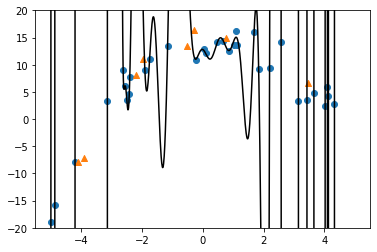

Polynomial coefficients
[12.800938413280596, -2.449077036138541, -68.46190973653094, 101.7384919327781, 733.4302821475892, -1151.8853658644125, -1462.839006814204, 2573.0667214080336, 1320.3241659181638, -2601.056276201179, -675.8021000991296, 1464.5703789063234, 214.94074629681685, -498.3949848407751, -43.6420838031743, 105.13056329135914, 5.509976128218666, -13.456010244593568, -0.3953062836397, 0.942990057188737, 0.013902415063665805, -0.022704088661067195, -0.00042822515920486773, -0.0008639900505437914, 2.879651485493785e-05, 2.4760906440206135e-05, 9.71536419503276e-07, 1.5703125163875499e-06, -7.057244475582218e-08, 1.802011657770725e-08, -5.583836559705417e-09, -1.1348479970011231e-09, -1.4720963892648893e-10, -6.761438506226703e-11, 2.0790773584711257e-12, -1.9091541469289718e-12, 3.925390335270401e-13, -2.4267162648391732e-14, 2.1494217308862593e-14, 4.468426443179966e-16, 8.073422117718015e-16, 3.391504503862506e-17, 2.1386263481701265e-17, 6.323295528482447e-19, 3.000217608

In [33]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [34]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data 
# normalization trick ;)

model_L1_reg = linear_model.Lasso(normalize=True,alpha=0.1).fit(X_train,y_train)
model_L1_reg.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


0.9072406908469024

Training error (rmse): 2.142582718194833
Testing error (rmse): 2.7032765155912357


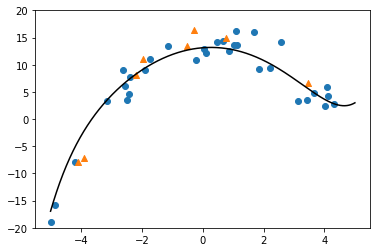

Polynomial coefficients
[13.12251637775979, 0.4365314064286865, -0.8039693868677468, 0.0, -0.0, 0.0, -0.0, 9.96975002036529e-05, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0

In [35]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [36]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data 
# normalization trick ;)

model_L2_reg = linear_model.Ridge(normalize=True,alpha=0.1).fit(X_train,y_train)
model_L2_reg.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


0.9172321470226672

Training error (rmse): 2.152797830067381
Testing error (rmse): 2.5535394023451667


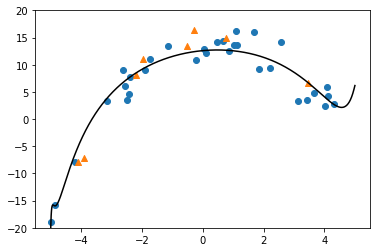

Polynomial coefficients
[12.589705115033366, 0.5141482337775917, -0.5356839431405277, 0.007536337759305062, -0.011483299912279744, 0.00045169706120758493, -0.00020758681743995416, 2.4848800597675313e-05, -2.9484662476981003e-06, 1.0365496404366997e-06, -1.3878268714473738e-08, 3.6276512531033884e-08, 1.3077782118260607e-09, 1.1308940371186276e-09, 8.229060043917523e-11, 3.2196504367284536e-11, 3.675868147833454e-12, 8.345334469985746e-13, 1.4830524044179316e-13, 1.8853315079685212e-14, 5.75776357786933e-15, 3.109383652256004e-16, 2.202614529577341e-16, -6.194996514101279e-19, 8.383650504798736e-18, -3.982330692852442e-19, 3.1872470659009414e-19, -2.628684046144267e-20, 1.2118172851297182e-20, -1.3278220506554736e-21, 4.608519847745847e-22, -6.00735304316212e-23, 1.7525267906237547e-23, -2.5612785357390374e-24, 6.661484917359368e-25, -1.0529569270921953e-25, 2.5299425036198405e-26, -4.225221525363846e-27, 9.597077106913905e-28, -1.6668762520083923e-28, 3.6352954262111774e-29, -6.4944681

In [37]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [38]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,0.756510,14.859288,1.334792e+01,12.992653,12.671665
1,-4.101756,-7.821475,-2.260442e+09,-4.141817,-5.150786
2,-0.520304,13.478608,3.574760e+01,12.677738,12.175248
3,-1.966873,11.133218,2.249694e+01,9.142335,9.247559
4,3.444219,6.685961,-6.459188e+03,5.662043,6.776598
5,-2.181622,8.160123,7.293902e+01,8.320250,8.526615
6,-0.278573,16.365057,1.137281e+01,12.938520,12.404674
7,-3.909422,-7.163796,-1.174344e+09,-2.263060,-2.786056
